In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(context = 'talk', style = 'darkgrid')

In [2]:
#import datasets 
test = pd.read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\After\Kaggle-Titanic-Machine-Learning-from-Disaster\Data\test.csv')
train = pd.read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\After\Kaggle-Titanic-Machine-Learning-from-Disaster\Data\train.csv')

In [3]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
#drop cabin column - as most of the data is missing
#drop ticket column 
train = train.drop(['Cabin', 'Ticket'], axis=1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [6]:
#replace missing values with NaN
cols_missing_vals = ['Age', 'Embarked'] # cols with missing values 
train[cols_missing_vals] = train[cols_missing_vals].replace(0, np.NaN) 

In [7]:
#drop NaNs
train = train.dropna(subset= ['Age', 'Embarked'])

In [8]:
#round fare to 2 decimal places 
train = train.round({'Fare': 2})

In [9]:
#change sex - male = 0, female = 1
train['Sex'] = train['Sex'].replace(['male', 'female'], [0, 1])

In [10]:
train['Sex'] = train['Sex'].astype(int)

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567346
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938696
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.330000


### Data Engineering 

In [12]:
#separate out the title from the name - split at the comma. 
#separate out the title from the name - split at the period.

train['Title_front'] = train['Name'].str.split(',').str[1] 
train['Title'] = train['Title_front'].str.split('.').str[0] 
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title_front,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.25,S,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.28,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs


In [13]:
#drop columns "Name" and "Title_front"
train = train.drop(['Name', 'Title_front'], axis=1)

In [14]:
#remove beginning whitespace 
#there was whitespace in front of the string, this removes that space 
train['Title'] = train['Title'].str.lstrip()

In [15]:
#find all the unique title values 
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
#create funtion to replace the title names to 4 titles 
def replace_titles(df):
    
    """ replace titles to limit to 5 (Mr., Mrs., Master, Miss., Dr.) 
        Mr. = Don, Major, Capt. Jonkheer, Rev, Col, Sir
        Mrs. = the Countess, Mme, Lady
        Miss. = Mlle, Ms
        Master 
        Dr """
    
    title_new = []
    
    for i in df['Title']:
        if i == 'Don':
            title_new.append('Mr')
        elif i == 'Major':
            title_new.append('Mr')
        elif i == 'Capt':
            title_new.append('Mr')
        elif i == 'Jonkheer':
            title_new.append('Mr')
        elif i == 'Rev': 
            title_new.append('Mr')
        elif i == 'Col':
            title_new.append('Mr')
        elif i == 'Sir':
            title_new.append('Mr')
        elif i == 'the Countess':
            title_new.append('Mrs')
        elif i == 'Mme':
            title_new.append('Mrs')
        elif i == 'Ms':
            title_new.append('Miss')
        elif i == 'Mlle':
            title_new.append('Miss')         
        else: 
            title_new.append(i)
            
    
    df['Title_new'] = title_new   

In [17]:
#replace the title names 
replace_titles(train)

In [18]:
#creating family size column
#taken from https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

train['Family_size'] = train['SibSp'] + train['Parch']

In [19]:
#creating age*class column 
#taken from https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

train['Age_class'] = train['Age'] * train['Pclass']

In [20]:
#fare/person - rounded to 2 decimal places 
train['Fare_per_person'] = train['Fare'] / (train['Family_size'] + 1)
train = train.round({'Fare_per_person': 2})

<AxesSubplot:>

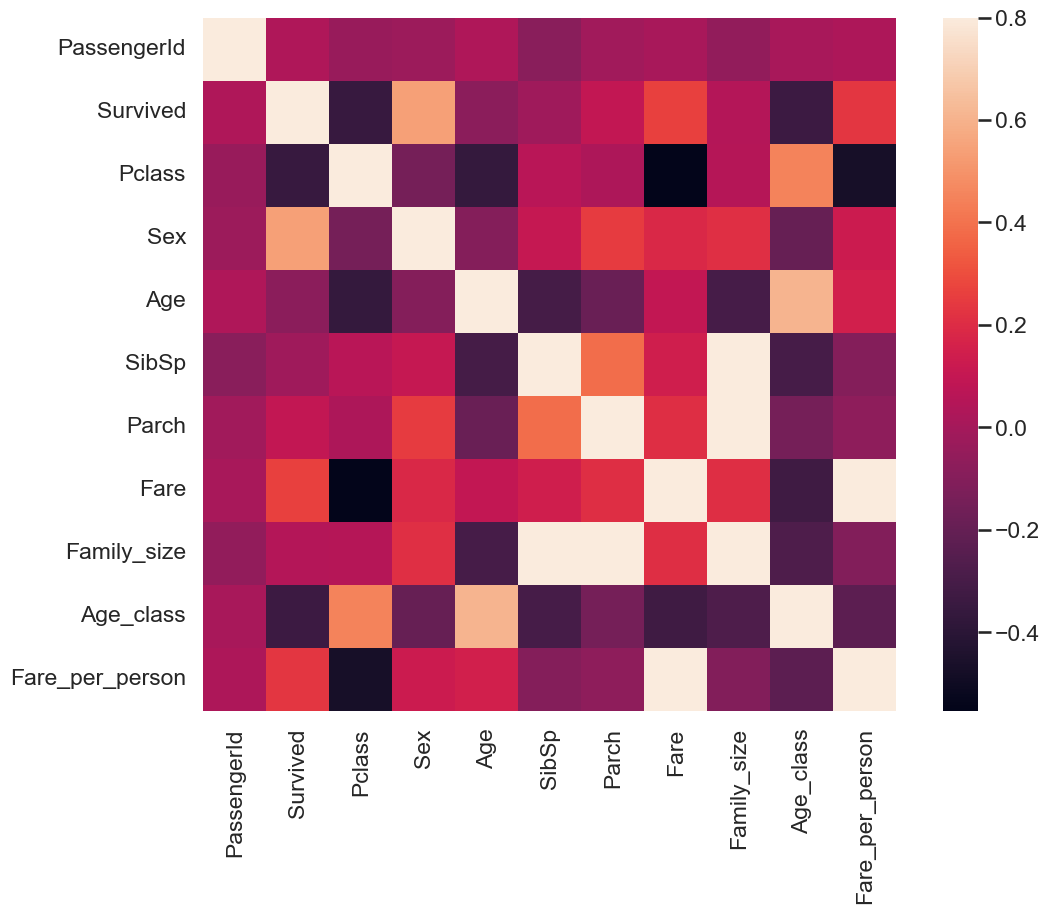

In [21]:
# correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_new,Family_size,Age_class,Fare_per_person
0,1,0,3,0,22.0,1,0,7.25,S,Mr,Mr,1,66.0,3.62
1,2,1,1,1,38.0,1,0,71.28,C,Mrs,Mrs,1,38.0,35.64
2,3,1,3,1,26.0,0,0,7.92,S,Miss,Miss,0,78.0,7.92
3,4,1,1,1,35.0,1,0,53.10,S,Mrs,Mrs,1,35.0,26.55
4,5,0,3,0,35.0,0,0,8.05,S,Mr,Mr,0,105.0,8.05


## EDA 

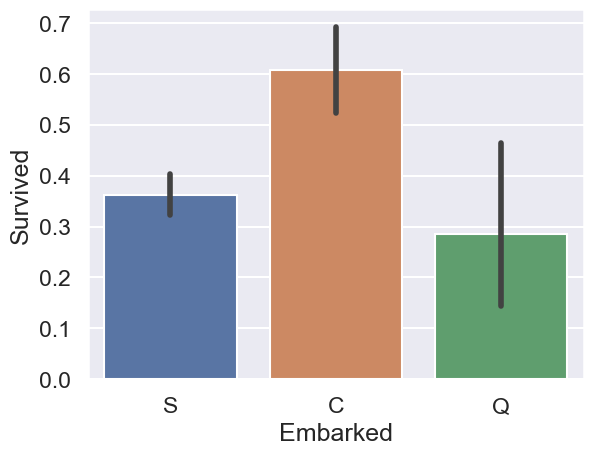

In [23]:
#bar chart survived and did not survive  by port 
sns.barplot(x = 'Embarked',
            y = 'Survived',
            data = train)
 
# Show the plot
plt.show()

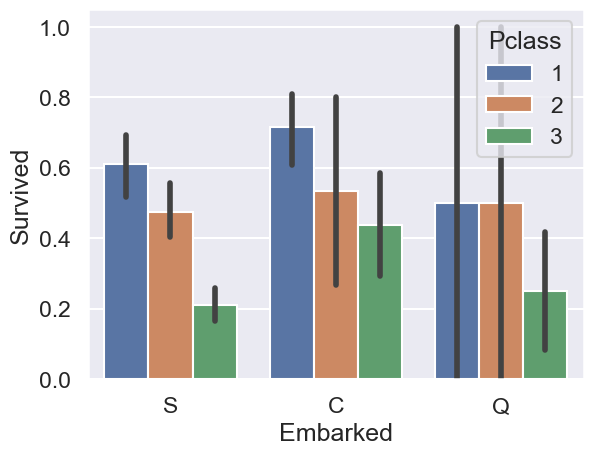

In [24]:
#bar chart survived and did not survive  by port 
sns.barplot(x = 'Embarked', y = 'Survived', data = train, hue = "Pclass")
plt.show()

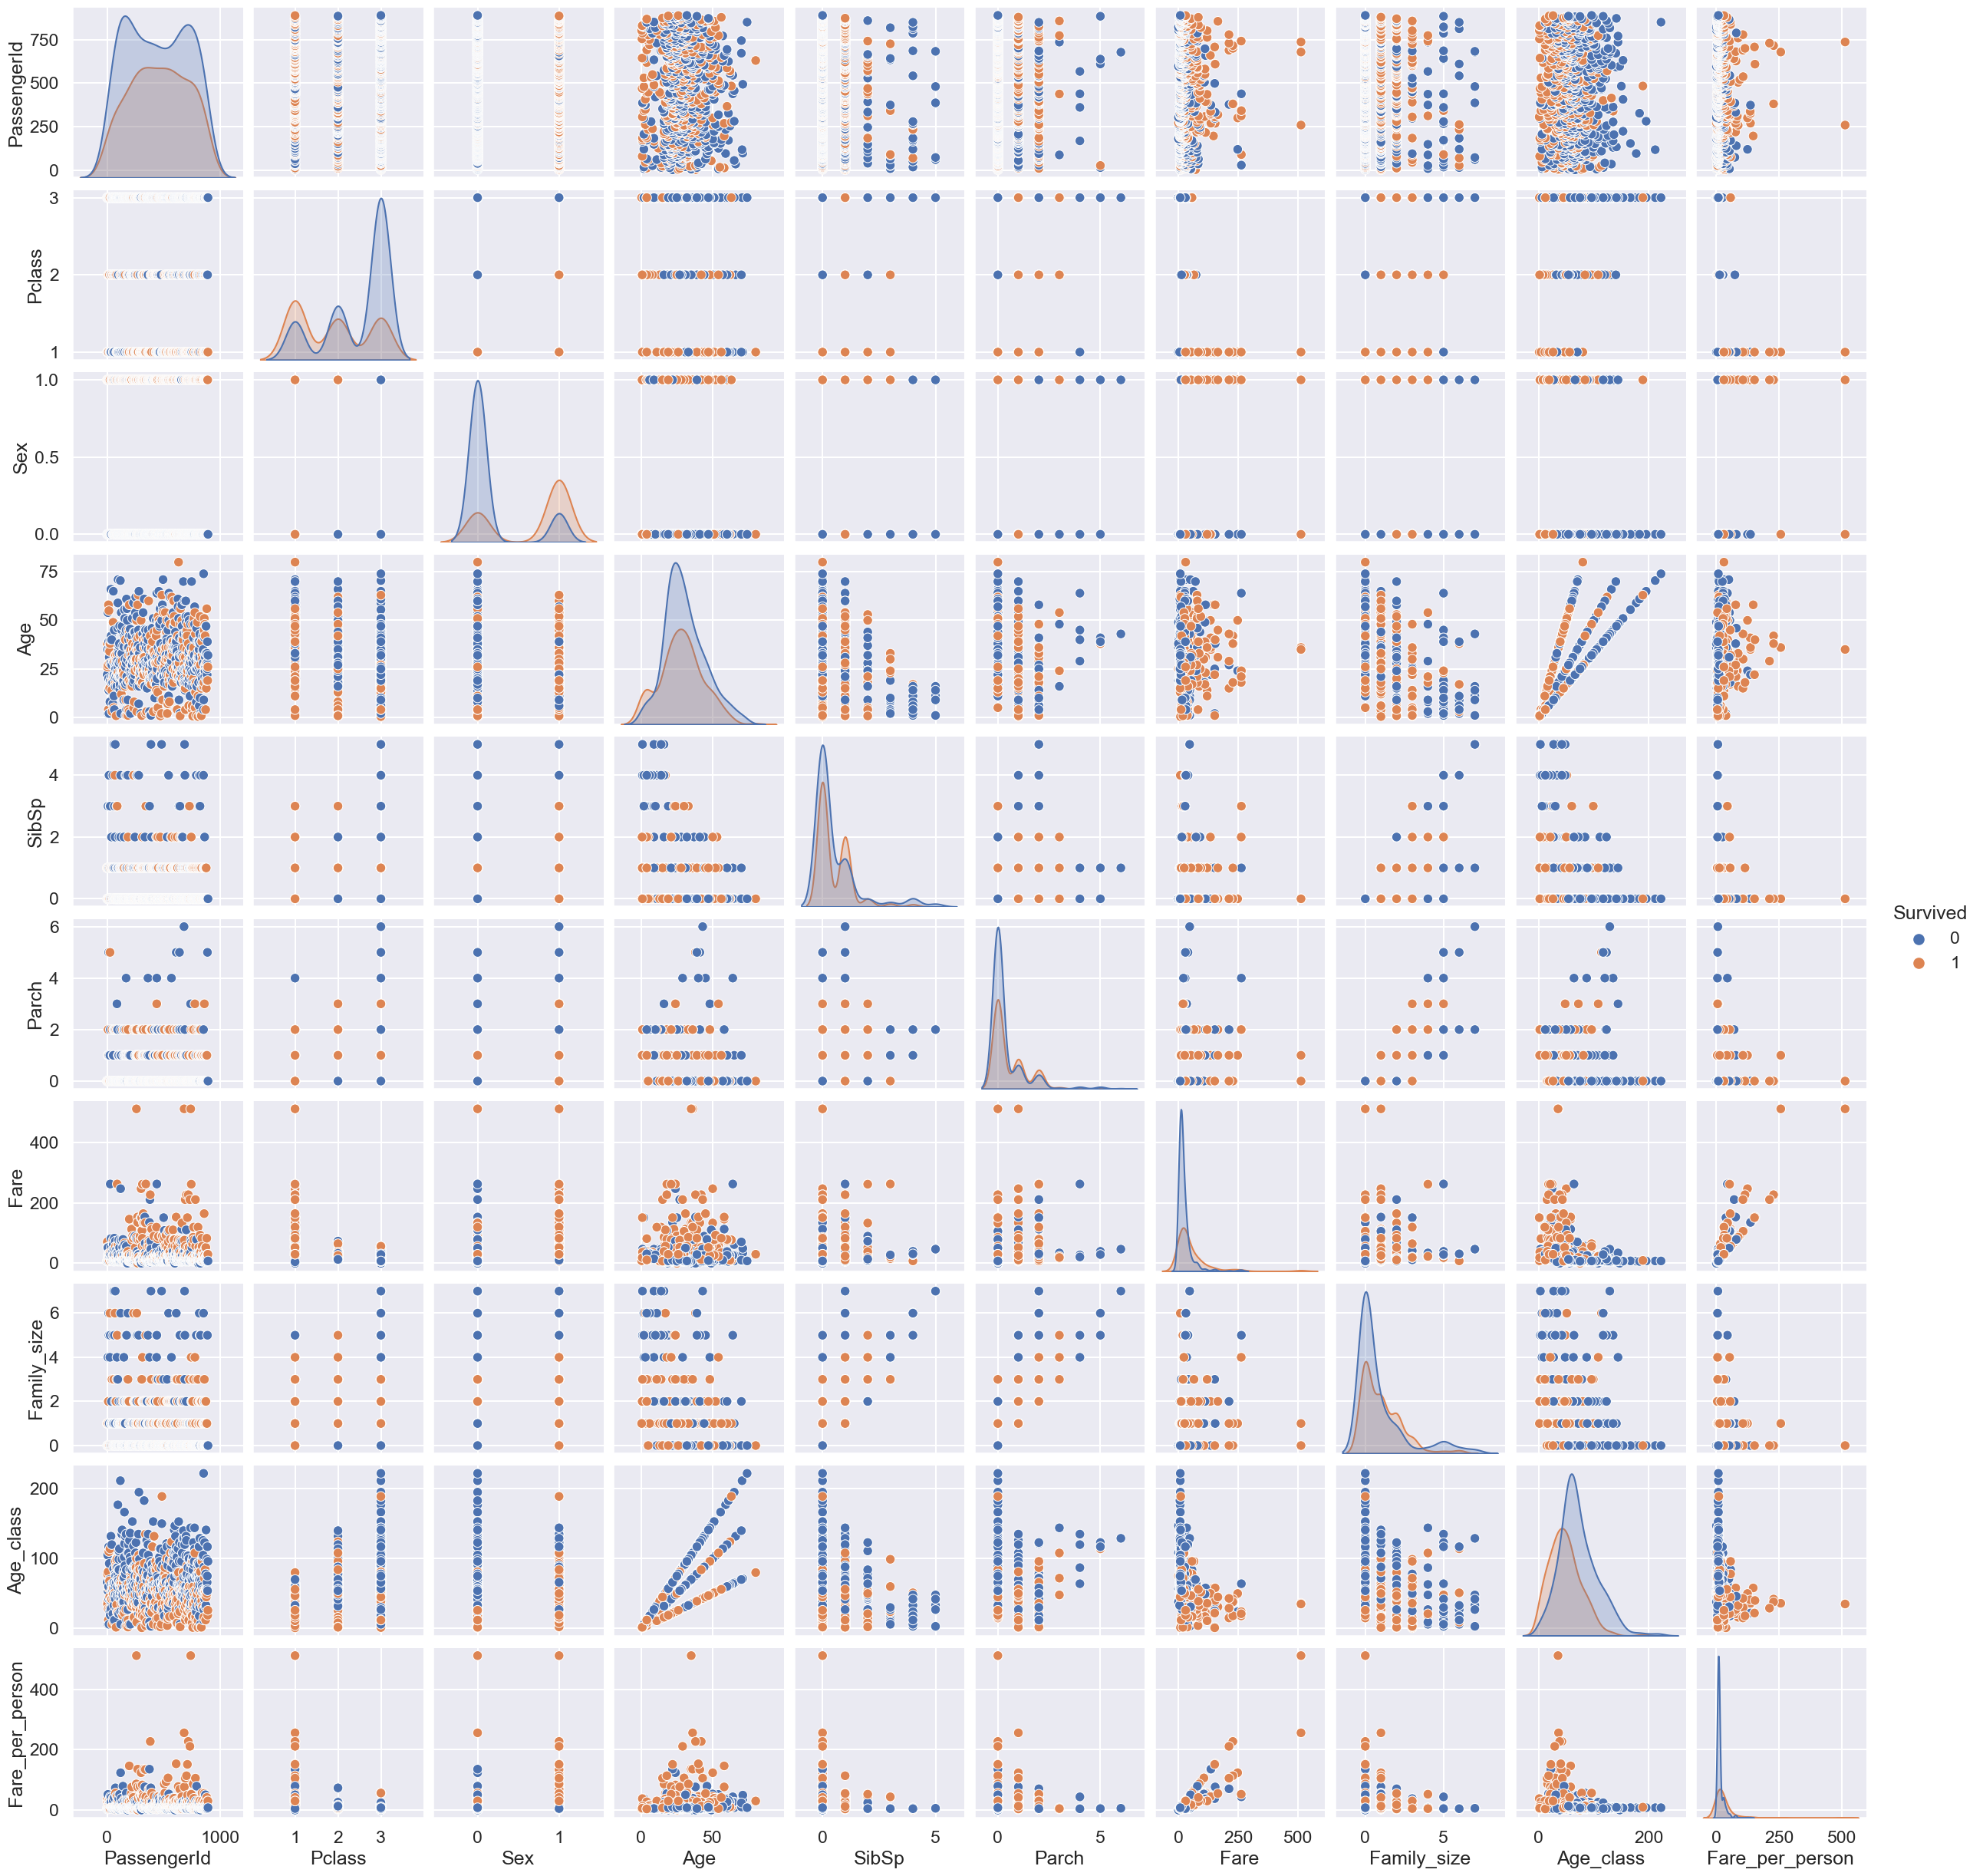

In [25]:
#pairplot 
sns.pairplot(train, hue = 'Survived')

In [26]:
#count of passengers 
passengers_south = len(train[train['Embarked'] == 'S'])
passengers_cher = len(train[train['Embarked'] == 'C'])
passengers_queen = len(train[train['Embarked'] == 'Q'])

print(f' {passengers_south} passengers embark in Southhampton')
print(f' {passengers_cher} passengers embark in Cherbourg')
print(f' {passengers_queen} passengers embark in Queenstown')

 554 passengers embark in Southhampton
 130 passengers embark in Cherbourg
 28 passengers embark in Queenstown


In [29]:
#count of passengers of each class who embarked at each port 
passengers_south_1 = len(train[(train['Embarked'] == 'S') & (train['Pclass'] == 1)])
passengers_south_2 = len(train[(train['Embarked'] == 'S') & (train['Pclass'] == 2)])
passengers_south_3 = len(train[(train['Embarked'] == 'S') & (train['Pclass'] == 3)])

passengers_cher_1 = len(train[(train['Embarked'] == 'C') & (train['Pclass'] == 1)])
passengers_cher_2 = len(train[(train['Embarked'] == 'C') & (train['Pclass'] == 2)])
passengers_cher_3 = len(train[(train['Embarked'] == 'C') & (train['Pclass'] == 3)])

passengers_queen_1 = len(train[(train['Embarked'] == 'Q') & (train['Pclass'] == 1)])
passengers_queen_2 = len(train[(train['Embarked'] == 'Q') & (train['Pclass'] == 2)])
passengers_queen_3 = len(train[(train['Embarked'] == 'Q') & (train['Pclass'] == 3)])

print(f'Those passengers that embarked at Southhampton: {round((passengers_south_1/passengers_south)*100, 2)}% were 1st class, {round((passengers_south_2/passengers_south)*100, 2)}% were 2nd class, {round((passengers_south_3/passengers_south)*100, 2)}% were 3rd class')
print(f'Those passengers that embarked at Cherbourg: {round((passengers_cher_1/passengers_cher)*100, 2)}% were 1st class, {round((passengers_cher_2/passengers_cher)*100, 2)}% were 2nd class, {round((passengers_cher_3/passengers_cher)*100, 2)}% were 3rd class')
print(f'Those passengers that embarked at Queenstown: {round((passengers_queen_1/passengers_queen)*100, 2)}% were 1st class, {round((passengers_queen_2/passengers_queen)*100, 2)}% were 2nd class, {round((passengers_queen_3/passengers_queen)*100, 2)}% were 3rd class')

Those passengers that embarked at Southhampton: 19.49% were 1st class, 28.16% were 2nd class, 52.35% were 3rd class
Those passengers that embarked at Cherbourg: 56.92% were 1st class, 11.54% were 2nd class, 31.54% were 3rd class
Those passengers that embarked at Queenstown: 7.14% were 1st class, 7.14% were 2nd class, 85.71% were 3rd class


In [31]:
#passengers that survived embarking from each port 
passengers_south_alive = len(train[(train['Embarked'] == 'S') & (train['Survived'] == 1)])
passengers_south_dead = len(train[(train['Embarked'] == 'S') & (train['Survived'] == 0)])

passengers_cher_alive = len(train[(train['Embarked'] == 'C') & (train['Survived'] == 1)])
passengers_cher_dead = len(train[(train['Embarked'] == 'C') & (train['Survived'] == 0)])

passengers_queen_alive = len(train[(train['Embarked'] == 'Q') & (train['Survived'] == 1)])
passengers_queen_dead = len(train[(train['Embarked'] == 'Q') & (train['Survived'] == 0)])

print(f'Shouthampton: {passengers_south_alive} survived, {passengers_south_dead} died')
print(f'Cherbourg: {passengers_cher_alive} survived, {passengers_cher_dead} died')
print(f'Queenstown: {passengers_queen_alive} survived, {passengers_queen_dead} died')

Shouthampton: 201 survived, 353 died
Cherbourg: 79 survived, 51 died
Queenstown: 8 survived, 20 died
